## Tweets Sentiment Analysis

In [18]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
from tqdm.autonotebook import tqdm
tqdm.pandas()

#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  # natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# For Building the model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

pd.options.plotting.backend = "plotly"

C:\Users\ronald\AppData\Local\Temp/ipykernel_8972/1525456955.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ronald\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The dataset was obtained from [Kaggle](https://www.kaggle.com/kaushiksuresh147/bitcoin-tweets "Follow Link")

In [2]:
# load dataset
df = pd.read_csv("Bitcoin_tweets.csv", low_memory=False)

In [3]:
df = df.drop(columns=['user_name', 'user_location', 'user_description', 'user_created','user_followers', 'user_friends', 'user_favourites', 'user_verified','hashtags', 'source', 'is_retweet'])
df.head()

,date,text
0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...
1,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""..."
2,2021-02-10 23:54:48,"Guys evening, I have read this article about B..."
3,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...
4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232809 entries, 0 to 1232808
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   date    1232805 non-null  object
 1   text    1232805 non-null  object
dtypes: object(2)
memory usage: 18.8+ MB


In [5]:
# convert date column into datetime object
df['date_dt']=pd.to_datetime(df.date, errors='coerce')
# check for nan values
df['date_dt'].isna().sum()

10

In [6]:
# drop nan values using dropna() function    
df = df.dropna()

In [7]:
# drop the time stamp
df['date']= pd.to_datetime(df['date_dt'].dt.date)

In [8]:
df = df.drop(columns=['date_dt'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232799 entries, 0 to 1232808
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   date    1232799 non-null  datetime64[ns]
 1   text    1232799 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 28.2+ MB


In [10]:
df= df.set_index('date')
df

,text
date,
2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...
2021-02-10,"😎 Today, that's this #Thursday, we will do a ""..."
2021-02-10,"Guys evening, I have read this article about B..."
2021-02-10,$BTC A big chance in a billion! Price: \487264...
2021-02-10,This network is secured by 9 508 nodes as of t...
...,...
2021-09-10,@SpeedUpBSC @debi_pada @AdaTiers @golf_grinder...
2021-09-10,"This time, what will happen between the US SEC..."
2021-09-10,One #btc is only 205 #EGLD.


In [12]:
df=df[['text']][0:30000]
df

,text
date,
2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...
2021-02-10,"😎 Today, that's this #Thursday, we will do a ""..."
2021-02-10,"Guys evening, I have read this article about B..."
2021-02-10,$BTC A big chance in a billion! Price: \487264...
2021-02-10,This network is secured by 9 508 nodes as of t...
...,...
2021-02-14,What's your favorite crypto? #biteris #btc #bi...
2021-02-14,[44] #Leeuwarden Earn #BitCoin (#BTC) just by ...
2021-02-14,🤝 Follow me on @betfury_io. Let's hunt for Bit...


## Data preprocessing

In [13]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

In [14]:
cleantext=[]
for item in tqdm(df['text']):
    words=tweet_to_words(item)
    cleantext+=[words]
df['cleantext']=cleantext
df

100%|██████████| 30000/30000 [03:01<00:00, 165.49it/s]


,text,cleantext
date,,
2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...,"[blue, ridg, bank, share, halt, nyse, bitcoin,..."
2021-02-10,"😎 Today, that's this #Thursday, we will do a ""...","[today, thursday, take, 2, friend, leowandersl..."
2021-02-10,"Guys evening, I have read this article about B...","[guy, even, read, articl, btc, would, like, sh..."
2021-02-10,$BTC A big chance in a billion! Price: \487264...,"[btc, big, chanc, billion, price, 4872644, 0, ..."
2021-02-10,This network is secured by 9 508 nodes as of t...,"[network, secur, 9, 508, node, today, soon, bi..."
...,...,...
2021-02-14,What's your favorite crypto? #biteris #btc #bi...,"[favorit, crypto, biteri, btc, bitcoin, crypto..."
2021-02-14,[44] #Leeuwarden Earn #BitCoin (#BTC) just by ...,"[44, leeuwarden, earn, bitcoin, btc, keep, com..."
2021-02-14,🤝 Follow me on @betfury_io. Let's hunt for Bit...,"[follow, betfuri, io, let, hunt, bitcoin, toge..."


In [15]:
def unlist(list):
    words=''
    for item in list:
        words+=item+' '
    return words

In [16]:
def compute_vader_scores(df, label):
    sid = SentimentIntensityAnalyzer()
    df["neg"] = df[label].progress_apply(lambda x: sid.polarity_scores(unlist(x))["neg"])
    df["neu"] = df[label].progress_apply(lambda x: sid.polarity_scores(unlist(x))["neu"])
    df["pos"] = df[label].progress_apply(lambda x: sid.polarity_scores(unlist(x))["pos"])
    df["comp"] = df[label].progress_apply(lambda x: sid.polarity_scores(unlist(x))["compound"])
    df['cleantext2'] = df[label].progress_apply(lambda x: unlist(x))
    return df

In [19]:
df2 = compute_vader_scores(df,'cleantext')
df2

  0%|          | 0/30000 [00:00<?, ?it/s]

  0%|          | 0/30000 [00:00<?, ?it/s]

  0%|          | 0/30000 [00:00<?, ?it/s]

  0%|          | 0/30000 [00:00<?, ?it/s]

  0%|          | 0/30000 [00:00<?, ?it/s]

,text,cleantext,neg,neu,pos,comp,cleantext2
date,,,,,,,
2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...,"[blue, ridg, bank, share, halt, nyse, bitcoin,...",0.0,0.872,0.128,0.2960,blue ridg bank share halt nyse bitcoin atm ann...
2021-02-10,"😎 Today, that's this #Thursday, we will do a ""...","[today, thursday, take, 2, friend, leowandersl...",0.0,0.775,0.225,0.4939,today thursday take 2 friend leowandersleb btc...
2021-02-10,"Guys evening, I have read this article about B...","[guy, even, read, articl, btc, would, like, sh...",0.0,0.719,0.281,0.5719,guy even read articl btc would like share http...
2021-02-10,$BTC A big chance in a billion! Price: \487264...,"[btc, big, chanc, billion, price, 4872644, 0, ...",0.0,1.000,0.000,0.0000,btc big chanc billion price 4872644 0 2021 02 ...
2021-02-10,This network is secured by 9 508 nodes as of t...,"[network, secur, 9, 508, node, today, soon, bi...",0.2,0.800,0.000,-0.5423,network secur 9 508 node today soon biggest be...
...,...,...,...,...,...,...,...
2021-02-14,What's your favorite crypto? #biteris #btc #bi...,"[favorit, crypto, biteri, btc, bitcoin, crypto...",0.0,1.000,0.000,0.0000,favorit crypto biteri btc bitcoin crypto crypt...
2021-02-14,[44] #Leeuwarden Earn #BitCoin (#BTC) just by ...,"[44, leeuwarden, earn, bitcoin, btc, keep, com...",0.0,1.000,0.000,0.0000,44 leeuwarden earn bitcoin btc keep comput kee...
2021-02-14,🤝 Follow me on @betfury_io. Let's hunt for Bit...,"[follow, betfuri, io, let, hunt, bitcoin, toge...",0.0,1.000,0.000,0.0000,follow betfuri io let hunt bitcoin togeth get ...


In [20]:
# Create a new column with the label response
#positive if compound > 0.3
#neutral if -0.3 < compound < 0.3
#negative if -0.3 >= compound

df2["label"] = 0
df2.loc[df2["comp"] > 0.3, "label"] = 1
df2.loc[df2["comp"] < -0.3, "label"] = -1

df2.head()


,text,cleantext,neg,neu,pos,comp,cleantext2,label
date,,,,,,,,
2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...,"[blue, ridg, bank, share, halt, nyse, bitcoin,...",0.0,0.872,0.128,0.2960,blue ridg bank share halt nyse bitcoin atm ann...,0
2021-02-10,"😎 Today, that's this #Thursday, we will do a ""...","[today, thursday, take, 2, friend, leowandersl...",0.0,0.775,0.225,0.4939,today thursday take 2 friend leowandersleb btc...,1
2021-02-10,"Guys evening, I have read this article about B...","[guy, even, read, articl, btc, would, like, sh...",0.0,0.719,0.281,0.5719,guy even read articl btc would like share http...,1
2021-02-10,$BTC A big chance in a billion! Price: \487264...,"[btc, big, chanc, billion, price, 4872644, 0, ...",0.0,1.000,0.000,0.0000,btc big chanc billion price 4872644 0 2021 02 ...,0
2021-02-10,This network is secured by 9 508 nodes as of t...,"[network, secur, 9, 508, node, today, soon, bi...",0.2,0.800,0.000,-0.5423,network secur 9 508 node today soon biggest be...,-1


In [21]:
df2.to_pickle('clean_tweets.pkl')

In [22]:
df = pd.read_pickle('clean_tweets.pkl')
df

,text,cleantext,neg,neu,pos,comp,cleantext2,label
date,,,,,,,,
2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...,"[blue, ridg, bank, share, halt, nyse, bitcoin,...",0.0,0.872,0.128,0.2960,blue ridg bank share halt nyse bitcoin atm ann...,0
2021-02-10,"😎 Today, that's this #Thursday, we will do a ""...","[today, thursday, take, 2, friend, leowandersl...",0.0,0.775,0.225,0.4939,today thursday take 2 friend leowandersleb btc...,1
2021-02-10,"Guys evening, I have read this article about B...","[guy, even, read, articl, btc, would, like, sh...",0.0,0.719,0.281,0.5719,guy even read articl btc would like share http...,1
2021-02-10,$BTC A big chance in a billion! Price: \487264...,"[btc, big, chanc, billion, price, 4872644, 0, ...",0.0,1.000,0.000,0.0000,btc big chanc billion price 4872644 0 2021 02 ...,0
2021-02-10,This network is secured by 9 508 nodes as of t...,"[network, secur, 9, 508, node, today, soon, bi...",0.2,0.800,0.000,-0.5423,network secur 9 508 node today soon biggest be...,-1
...,...,...,...,...,...,...,...,...
2021-02-14,What's your favorite crypto? #biteris #btc #bi...,"[favorit, crypto, biteri, btc, bitcoin, crypto...",0.0,1.000,0.000,0.0000,favorit crypto biteri btc bitcoin crypto crypt...,0
2021-02-14,[44] #Leeuwarden Earn #BitCoin (#BTC) just by ...,"[44, leeuwarden, earn, bitcoin, btc, keep, com...",0.0,1.000,0.000,0.0000,44 leeuwarden earn bitcoin btc keep comput kee...,0
2021-02-14,🤝 Follow me on @betfury_io. Let's hunt for Bit...,"[follow, betfuri, io, let, hunt, bitcoin, toge...",0.0,1.000,0.000,0.0000,follow betfuri io let hunt bitcoin togeth get ...,0


In [23]:
df['label'].value_counts()

 0    19561
 1     8707
-1     1732
Name: label, dtype: int64

## Visualize the data

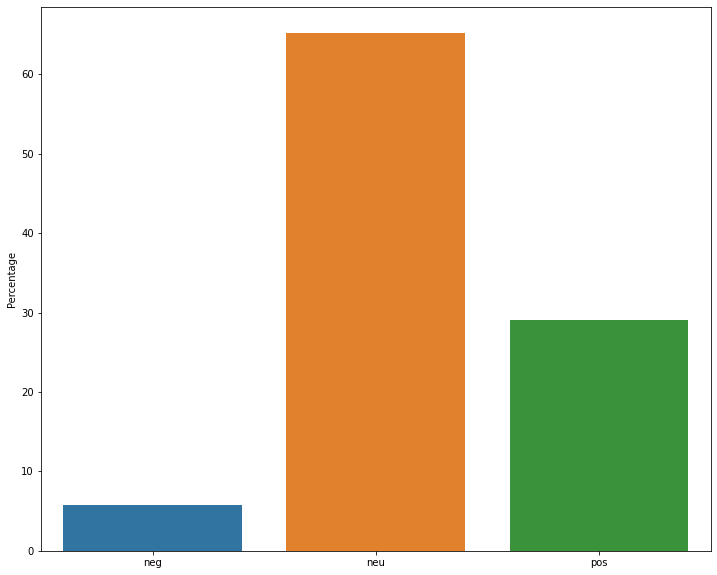

In [24]:
# Visualize sentiment

fig, ax = plt.subplots(figsize = (12, 10))
counts = df.label.value_counts(normalize=True) * 100
sns.barplot(x = counts.index, y = counts, ax=ax)
ax.set_xticklabels(['neg', 'neu', 'pos'])
ax.set_ylabel("Percentage")
plt.show()

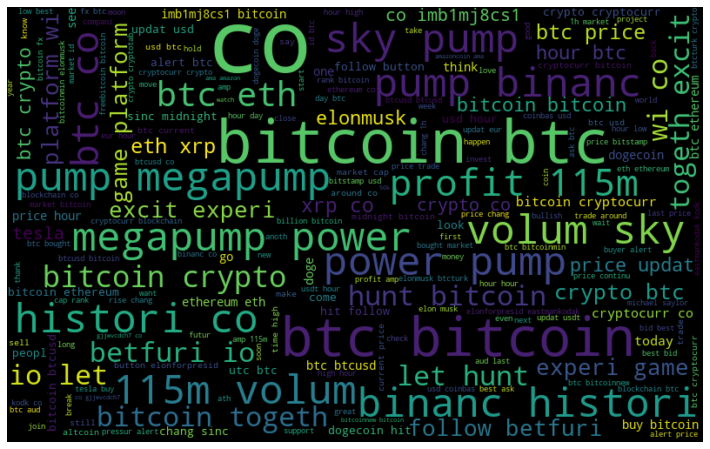

In [27]:
# Visualize the most frequent words
all_words = " ".join([sentence for sentence in df['cleantext2']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
# Tokenize and Pad sequence to have the same length

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['cleantext2'][0])
X, tokenizer = tokenize_pad_sequences(df['cleantext2'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 blue ridg bank share halt nyse bitcoin atm announc http co xaazmajkiv myblueridgebank http co sgbxmkp1si 
After Tokenization & Padding 
 [1223 2169  224  379 4629 3244    3 1300  321    2    1    2    1    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [30]:
print(X.shape)

(30000, 50)


In [31]:
# Split the data 

from sklearn.model_selection import train_test_split

y = pd.get_dummies(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set: ', X_train.shape, y_train.shape)
print('Validation Set: ', X_val.shape, y_val.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (18000, 50) (18000, 3)
Validation Set:  (6000, 50) (6000, 3)
Test Set:  (6000, 50) (6000, 3)


In [32]:
# Define a function for precision and recall

import tensorflow.keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

## Model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import History
from tensorflow.keras import losses

In [34]:
vocab_size = 5000
embedding_size = 32
epochs = 10
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

In [35]:
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

In [ ]:
#pip install pydot

In [ ]:
#pip install graphviz

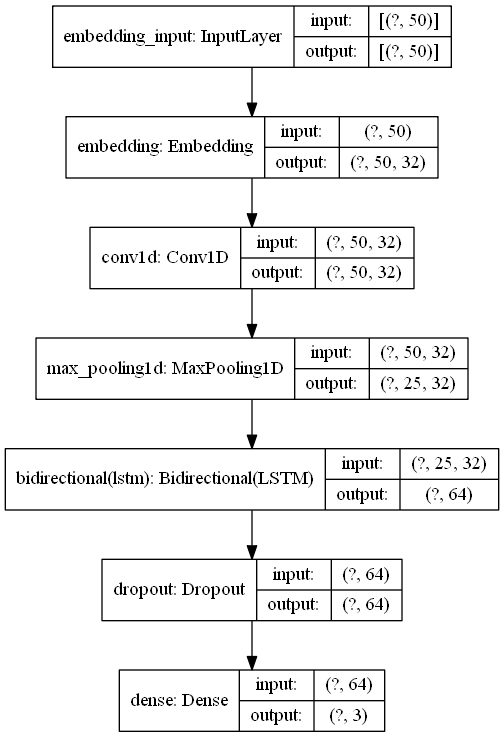

In [36]:
# Visualize tensflow model
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [37]:
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy', Precision(), Recall()])

In [38]:
history = model.fit(X_train,y_train,validation_data=(X_val, y_val),batch_size=64,epochs=epochs,verbose=1)

Epoch 1/10
282/282 [==============================] - 9s 33ms/step - loss: 0.7512 - accuracy: 0.6909 - precision: 0.6947 - recall: 0.6791 - val_loss: 0.6646 - val_accuracy: 0.7233 - val_precision: 0.7297 - val_recall: 0.7205
Epoch 2/10
282/282 [==============================] - 8s 29ms/step - loss: 0.5437 - accuracy: 0.8049 - precision: 0.8159 - recall: 0.7891 - val_loss: 0.5244 - val_accuracy: 0.8140 - val_precision: 0.8402 - val_recall: 0.7817
Epoch 3/10
282/282 [==============================] - 9s 33ms/step - loss: 0.4142 - accuracy: 0.8711 - precision: 0.8780 - recall: 0.8624 - val_loss: 0.4174 - val_accuracy: 0.8602 - val_precision: 0.8652 - val_recall: 0.8535
Epoch 4/10
282/282 [==============================] - 9s 32ms/step - loss: 0.3558 - accuracy: 0.8908 - precision: 0.8975 - recall: 0.8857 - val_loss: 0.3803 - val_accuracy: 0.8890 - val_precision: 0.8995 - val_recall: 0.8818
Epoch 5/10
282/282 [==============================] - 9s 34ms/step - loss: 0.3275 - accuracy: 0.9008

In [39]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.9067
Precision : 0.9166
Recall    : 0.8993
F1 Score  : 0.9079


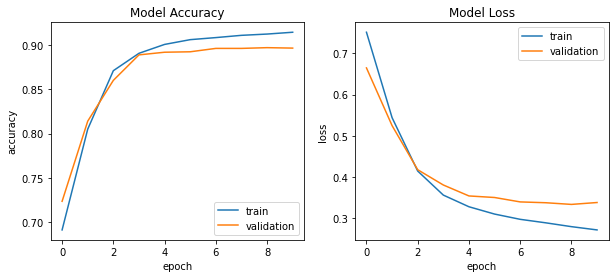

In [40]:
# Plot Model accuracy and loss function

def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

1    3938
2    1738
0     324
dtype: int64
1    4075
2    1925
dtype: int64


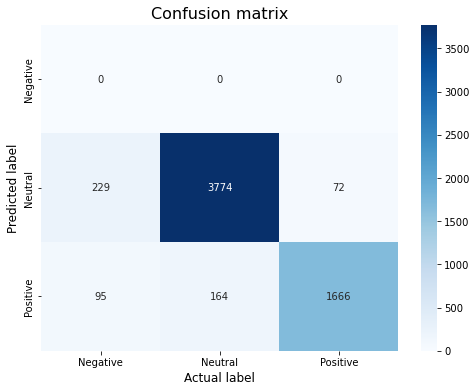

In [41]:
# Plot confusion matrix

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative','Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(y_pred, axis=1),np.argmax(np.array(y_test),axis=1))
    
    print(pd.Series(np.argmax(np.array(y_test),axis=1)).value_counts())
    print(pd.Series(np.argmax(y_pred, axis=1)).value_counts())
    
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)